In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

blobs = pd.read_csv('data.csv', sep=',')
colnames = list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


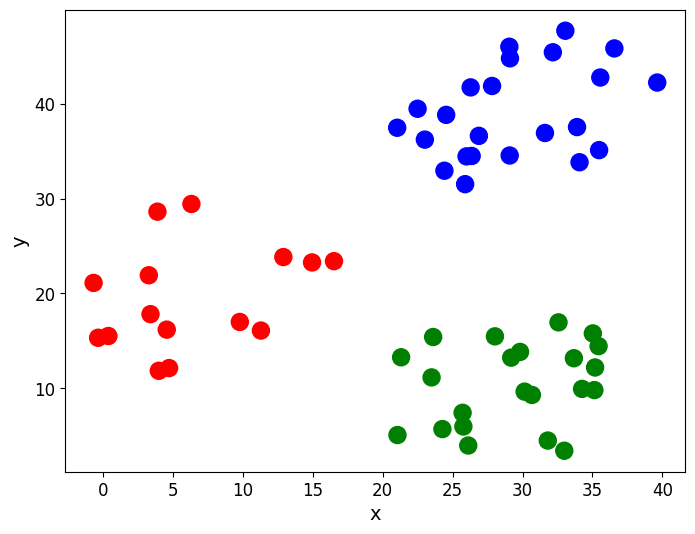

In [2]:
customcmap = ListedColormap(['red', 'green', 'blue'])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, c=blobs['cluster'].astype('category'), cmap=customcmap)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [3]:
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k = 3
df = blobs[['x', 'y']]
centroids = initiate_centroids(k, df)

print(centroids)

         x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609


In [4]:
def rss_err(a, b):
    return np.sum(np.square(a-b))

In [5]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rss_err(centroids.iloc[centroid, :], df.iloc[36, :])
    print('Error {0}: {1:.2f}'.format(i, err))

Error 0: 19.60
Error 1: 26.92
Error 2: 0.00


In [6]:
def centroid_assign(dset, centroids):
    
    k = centroids.shape[0]
    n = dset.shape[0]
    assign = []
    assign_errs = []

    for obs in range(n):
        all_errs = np.array([])
        for centroid in range(k):
            err = rss_err(centroids.iloc[centroid, :], dset.iloc[obs, :])
            all_errs = np.append(all_errs, err)

        nearest_centroid = np.where(all_errs==np.amin(all_errs))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errs)

        assign.append(nearest_centroid)
        assign_errs.append(nearest_centroid_error)
        
    return assign, assign_errs

In [7]:
df.loc[:, 'centroid'], df.loc[:, 'error'] = centroid_assign(df, centroids)
print(df.head())

        x       y  centroid       error
0  24.412  32.932         0    0.000000
1  35.190  12.189         1  459.928485
2  26.288  41.718         2   26.449981
3   0.376  15.506         0  881.394772
4  26.116   3.963         1  759.162433


/tmp/ipykernel_56548/4283580820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'centroid'], df.loc[:, 'error'] = centroid_assign(df, centroids)


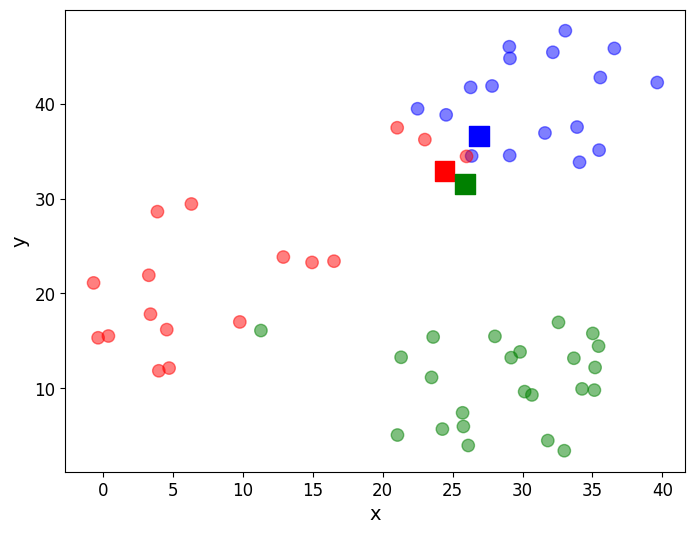

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', c=[0, 1, 2], cmap=customcmap, s=200)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [9]:
print("Total error is: {0:.2f}".format(df['error'].sum()))

Total error is: 20606.95


In [10]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop=True)
print(centroids)

           x          y
0   9.889444  23.242611
1  28.435750  11.546250
2  30.759333  40.311167


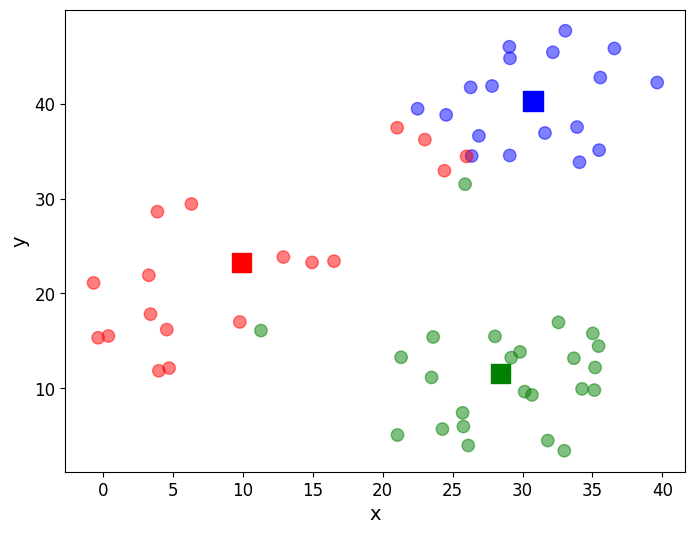

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', c=[0, 1, 2], cmap=customcmap, s=200)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [12]:
def kmeans(dset, k=2, tol=1e-4):
    
    working_dset = dset.copy()

    err = []
    goahead = True
    j = 0

    # step 2
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # step 3, 4
        working_dset['centroid'], j_err = centroid_assign(working_dset, centroids)
        err.append(sum(j_err))

        # step 5
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

        # step 6
        if j>0:
            if err[j-1]-err[j]<=tol:
                goahead = False

        j+=1

    return working_dset['centroid'], j_err, centroids

In [13]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmeans(df[['x', 'y']], 3)
print(df.head())

        x       y  centroid      error
0  24.412  32.932         2  61.380524
1  35.190  12.189         1  37.415091
2  26.288  41.718         2  16.216075
3   0.376  15.506         0  51.798518
4  26.116   3.963         1  52.188602


In [14]:
print(centroids)

           x          y
0   6.322867  19.559800
1  29.330864  10.432409
2  29.304957  39.050783


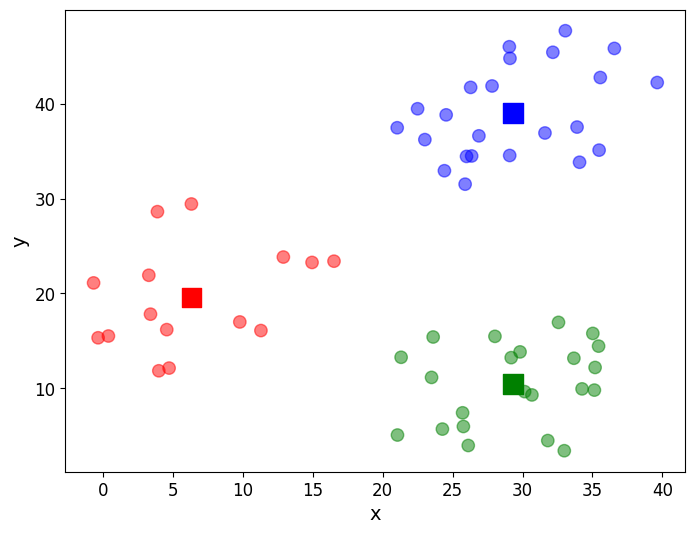

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', c=[0, 1, 2], cmap=customcmap, s=200)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

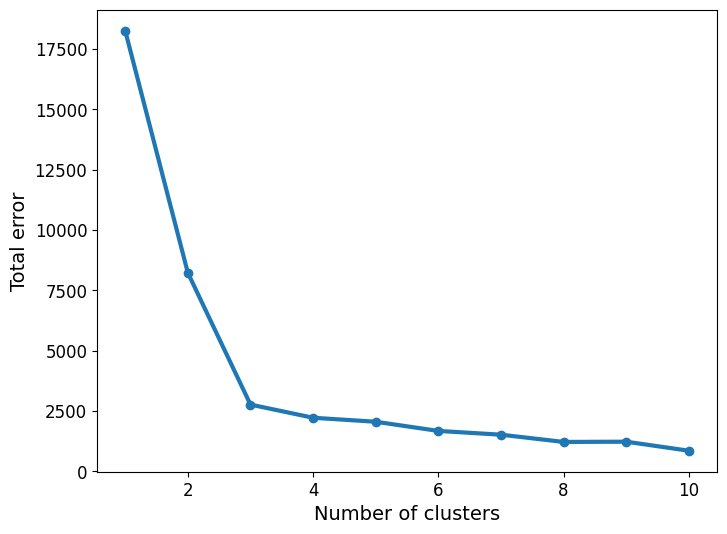

In [16]:
err_total = []
n = 10

df_elbow = blobs[['x', 'y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n+1), err_total, linewidth=3, marker='o')

ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r"Total error", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()